### Assignment 07

You can use the local Jupyter environment if you are not comfortable with Colab for this assignment.
The first half of this assignment is a repeat of assignment 05.
This gives you a chance to refresh.
The second half is new and gives you a chance to perform additional practices.
You also get a chance to use some of the Python libraries and techniques.
You will unzip the zip file manually in preparation for this assignment.
The link to the zip file is (you have already used it in your assignment 5):
https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip
After unzipping, You will have all files in one folder named "CollegeScorecard_Raw_Data"
The folder contains the yearly data files from 1996 to 2019 school years.
if you are using your local environment, I suggest you create a new folder call "Assignment7" and place the Notebook file and the data folder under it.
Assignment7/
    - assignment_07.ipynb
    - CollegeScorecard_Raw_Data/
        - ...
        - 'MERGED1996_97_PP.csv',
        - 'MERGED2015_16_PP.csv',
        - ...
        - 'MERGED2017_18_PP.csv'

In [1]:
# <1> 
# Import libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)

In [3]:
# <2> 
# Display the current workin directory using os.getcwd()
# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder

In [4]:
os.getcwd()

'/Users/priyajyesta'

In [5]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder.
# use this method to assign the contents (list of file names) of the data folder to a variable and display it.
# # You can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder


In [6]:
file_names = os.listdir()
file_names

['hello.py',
 'untitled2',
 'MERGED2011_12_PP.csv',
 'Untitled10.ipynb',
 'Untitled7.ipynb',
 'Untitled34.ipynb',
 'Music',
 'MERGED1999_00_PP.csv',
 'MERGED2006_07_PP.csv',
 '.condarc',
 'Untitled36.ipynb',
 'Data-690-07Assignment.ipynb',
 'Untitled12.ipynb',
 'Untitled5.ipynb',
 'Untitled1.ipynb',
 'unt76itled1.ipynb',
 'MERGED2014_15_PP.csv',
 'Untitled16.ipynb',
 '.DS_Store',
 'nltk_data',
 '690_w3_3.ipynb',
 'Untitled32.ipynb',
 'week1_601.py',
 '.CFUserTextEncoding',
 'Untitled30.ipynb',
 'Untitled29.ipynb',
 'Untitled3.ipynb',
 'Untitled14.ipynb',
 'MERGED2003_04_PP.csv',
 'Untitled.ipynb',
 'Untitled37.ipynb',
 'MERGED1996_97_PP.csv',
 'Chapter-1-code-to-review-2.ipynb',
 'Chapter-2-code-to-review.ipynb',
 'Untitled4.ipynb',
 'FieldOfStudyData1516_1617_PP.csv',
 'Untitled13.ipynb',
 'Untitled6.ipynb',
 'Pictures',
 'MERGED2012_13_PP.csv',
 'Untitled11.ipynb',
 'MERGED2005_06_PP.csv',
 'Untitled35.ipynb',
 'MERGED2009_10_PP.csv',
 'BobBackup.sql',
 'Untitled31.ipynb',
 'Untitled

In [7]:
# <4> 
# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.

In [8]:
csv_files = [name for name in file_names if name.endswith(".csv")]

csv_files

['MERGED2011_12_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED1996_97_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2010_11_PP.csv',
 'FieldOfStudyData1415_1516_PP.csv']

In [9]:
merged_files = [name for name in file_names if name.startswith("MERGED")]

merged_files.sort()
merged_files

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [10]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one

In [11]:
df_list = []

for file in merged_files:
    df = pd.read_csv(file, usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
    df['YEAR'] = file[6:10]
    df_list.append(df)
    print(file)

MERGED1996_97_PP.csv
MERGED1997_98_PP.csv
MERGED1998_99_PP.csv
MERGED1999_00_PP.csv
MERGED2000_01_PP.csv
MERGED2001_02_PP.csv
MERGED2002_03_PP.csv
MERGED2003_04_PP.csv
MERGED2004_05_PP.csv
MERGED2005_06_PP.csv
MERGED2006_07_PP.csv
MERGED2007_08_PP.csv
MERGED2008_09_PP.csv
MERGED2009_10_PP.csv
MERGED2010_11_PP.csv
MERGED2011_12_PP.csv
MERGED2012_13_PP.csv
MERGED2013_14_PP.csv
MERGED2014_15_PP.csv
MERGED2015_16_PP.csv
MERGED2016_17_PP.csv
MERGED2017_18_PP.csv
MERGED2018_19_PP.csv


In [12]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

In [13]:
df = pd.concat(df_list)
df.head(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5.0,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN,1996
4,100690,Amridge University,AL,5.0,NaN,NaN,1996


In [14]:
df.tail(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
6801,48511112,Georgia Military College - Dublin,GA,5.0,NaN,6120.0,2018
6802,48511113,Georgia Military College - Eastman,GA,5.0,NaN,6120.0,2018
6803,48616901,American College of Barbering - Florence,KY,5.0,NaN,NaN,2018
6804,49005401,HCI College - Fort Lauderdale Campus,FL,5.0,NaN,21420.0,2018
6805,49146401,ABC Adult School - Cabrillo Lane,CA,8.0,NaN,NaN,2018


In [15]:
df.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
544,123165,Scripps College,CA,8.0,0.3910,40450.0,2010
3890,221148,Lincoln College of Technology-Nashville,TN,5.0,0.4786,NaN,2008
3138,201955,University of Cincinnati-Blue Ash College,OH,3.0,NaN,5232.0,2007
7207,476975,Colorado State University-Global Campus,CO,7.0,NaN,NaN,2013
4227,366401,Las Positas College,CA,8.0,NaN,1138.0,2016


In [16]:
df.columns

Index(['UNITID', 'INSTNM', 'STABBR', 'REGION', 'ADM_RATE', 'TUITIONFEE_IN',
       'YEAR'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163331 entries, 0 to 6805
Data columns (total 7 columns):
UNITID           163331 non-null int64
INSTNM           163331 non-null object
STABBR           163331 non-null object
REGION           163330 non-null float64
ADM_RATE         44911 non-null float64
TUITIONFEE_IN    79194 non-null float64
YEAR             163331 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 10.0+ MB


In [18]:
df.dtypes

UNITID             int64
INSTNM            object
STABBR            object
REGION           float64
ADM_RATE         float64
TUITIONFEE_IN    float64
YEAR              object
dtype: object

In [19]:
df.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,1.633310e+05,163330.000000,44911.000000,79194.000000
mean,9.432395e+05,4.554693,0.692946,11665.505367
std,4.571721e+06,2.189217,0.217062,9985.998016
min,1.006360e+05,0.000000,0.000000,0.000000
25%,1.633380e+05,3.000000,0.555000,3776.000000
50%,2.127800e+05,5.000000,0.717500,9285.000000
75%,4.075680e+05,6.000000,0.857100,16146.000000
max,4.914640e+07,9.000000,1.000000,74787.000000


In [20]:
df.isna().sum()

UNITID                0
INSTNM                0
STABBR                0
REGION                1
ADM_RATE         118420
TUITIONFEE_IN     84137
YEAR                  0
dtype: int64

In [21]:
# <7>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

In [22]:
df_umbc = df[df["INSTNM"] == "University of Maryland-Baltimore County"]
df_umbc

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005


In [23]:
df_umbc

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005


In [24]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

In [25]:
df_umbc.head(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000


In [26]:
df_umbc.tail(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
1555,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015
1510,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
1478,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
1415,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018


In [27]:
df_umbc.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005
1629,163268,University of Maryland-Baltimore County,MD,2.0,0.6315,10068.0,2013
1660,163268,University of Maryland-Baltimore County,MD,2.0,0.6035,9764.0,2012
1745,163268,University of Maryland-Baltimore County,MD,2.0,0.6890,8872.0,2009
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997


In [28]:
df_umbc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 2151 to 1415
Data columns (total 7 columns):
UNITID           23 non-null int64
INSTNM           23 non-null object
STABBR           23 non-null object
REGION           23 non-null float64
ADM_RATE         18 non-null float64
TUITIONFEE_IN    19 non-null float64
YEAR             23 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 1.4+ KB


In [29]:
df_umbc.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,23.0,23.0,18.000000,19.000000
mean,163268.0,2.0,0.640694,9004.842105
std,0.0,0.0,0.052728,1825.795421
min,163268.0,2.0,0.568300,5490.000000
25%,163268.0,2.0,0.597600,8270.000000
50%,163268.0,2.0,0.632100,8872.000000
75%,163268.0,2.0,0.689375,10226.000000
max,163268.0,2.0,0.717400,11778.000000


In [30]:
df_umbc.isna().sum()

UNITID           0
INSTNM           0
STABBR           0
REGION           0
ADM_RATE         5
TUITIONFEE_IN    4
YEAR             0
dtype: int64

In [31]:
df_umbc.isna().sum()

UNITID           0
INSTNM           0
STABBR           0
REGION           0
ADM_RATE         5
TUITIONFEE_IN    4
YEAR             0
dtype: int64

In [32]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart

Text(0.5, 1.0, "UMBC's in-state tution overtime from 1996 to 2019")

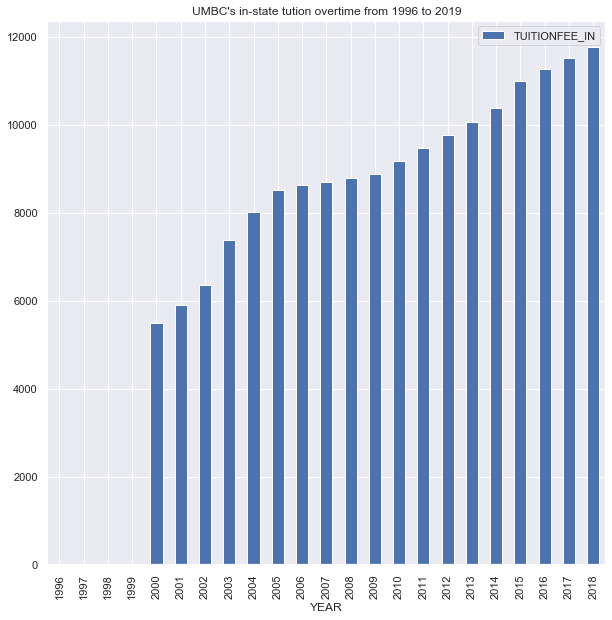

In [33]:
df_umbc.plot.bar(x = "YEAR", y = "TUITIONFEE_IN", figsize= (10,10))
plt.title("UMBC's in-state tution overtime from 1996 to 2019")

In [34]:
# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart

Text(0.5, 1.0, "UMBC's in-state tution overtime from 1996 to 2019")

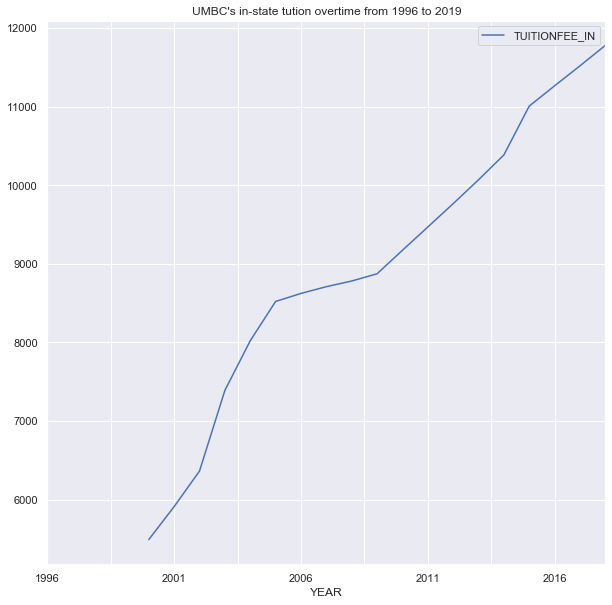

In [35]:
df_umbc.plot.line(x = "YEAR", y = "TUITIONFEE_IN", figsize= (10,10))
plt.title("UMBC's in-state tution overtime from 1996 to 2019")

In [36]:
# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List

In [37]:
tution = []
tution = df_umbc["TUITIONFEE_IN"].to_list()

In [38]:
tution 

[nan,
 nan,
 nan,
 nan,
 5490.0,
 5910.0,
 6362.0,
 7388.0,
 8020.0,
 8520.0,
 8622.0,
 8708.0,
 8780.0,
 8872.0,
 9171.0,
 9467.0,
 9764.0,
 10068.0,
 10384.0,
 11006.0,
 11264.0,
 11518.0,
 11778.0]

In [39]:
# Loop through the list and calculate the % change each year over the prior year
# This takes some effort. Not hard, just some abstract/logical thinking and some experiments
# Have fun on this one

In [40]:
percent_list = []
for i in range(len(tution)):
    change = (tution[i]-tution[i-1])/tution[i-1]
    percentage = (change * 100)
    percent_list.append(percentage)

In [41]:
percent_list

[nan,
 nan,
 nan,
 nan,
 nan,
 7.650273224043716,
 7.648054145516074,
 16.12700408676517,
 8.554412560909583,
 6.234413965087282,
 1.1971830985915493,
 0.9974483878450475,
 0.8268259072117593,
 1.0478359908883828,
 3.370153291253381,
 3.227565151019518,
 3.1372134783986483,
 3.11347808275297,
 3.1386571315057608,
 5.989984591679507,
 2.344175904052335,
 2.254971590909091,
 2.2573363431151243]

In [42]:
# The resulting number has many decimal points which are unnecessary and not visually appealing.
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity

In [43]:
decimal_percent_list = []
for i in percent_list:
        decimal_percent_list.append(round(i,2))  

In [44]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
# Not as hard as you may think. If you get stuck, you think too hard. 
# Google it and you will find the answer.

In [45]:
df_umbc['PCT_CHANGE'] = np.array(decimal_percent_list)

/Users/priyajyesta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
df_umbc

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996,NaN
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997,NaN
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998,NaN
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999,NaN
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000,NaN
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001,7.65
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002,7.65
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003,16.13
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004,8.55
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005,6.23


In [47]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart

Text(0.5, 1.0, "UMBC's in-state tution percentage Change")

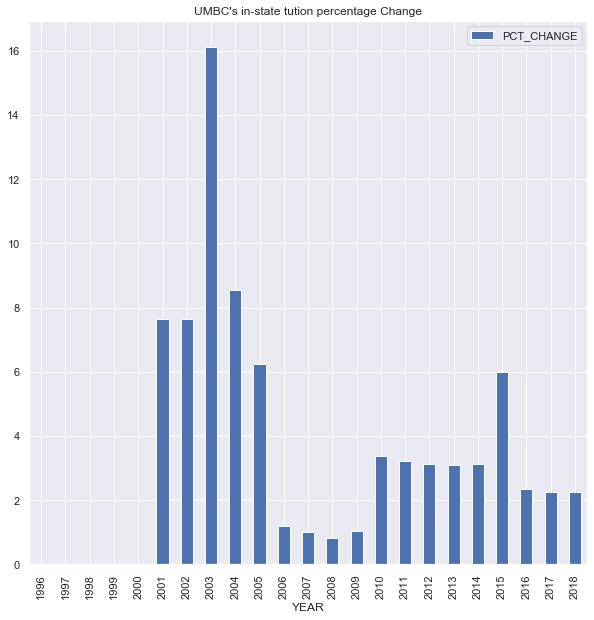

In [48]:
df_umbc.plot.bar(x = "YEAR", y = "PCT_CHANGE", figsize= (10,10))
plt.title("UMBC's in-state tution percentage Change")

Text(0.5, 1.0, "UMBC's in-state tution percentage Change")

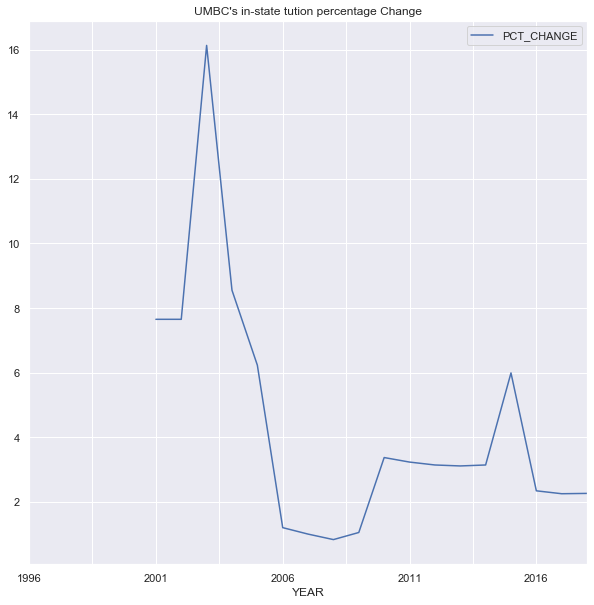

In [49]:
df_umbc.plot.line(x = "YEAR", y = "PCT_CHANGE", figsize= (10,10))
plt.title("UMBC's in-state tution percentage Change")

In [50]:
# <12>
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later 

In [51]:
# <13>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

In [52]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together

In [53]:
# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier

In [54]:
def percent_change(tution_list):
    percent_list = []
    for i in range(len(tution_list)):
        change = (tution_list[i]-tution_list[i-1])/tution_list[i-1]
        percentage = (change * 100)
        percent_list.append(percentage)
    percent_list_decimal = []
    for i in percent_list:
        percent_list_decimal.append(round(i,2))
    return percent_list_decimal

In [55]:
df_jhu = df[df["INSTNM"] == "Johns Hopkins University"]
df_jhu

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000
1906,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001
1884,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003
1823,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005


In [56]:
tution_jhu = df_jhu['TUITIONFEE_IN'].tolist()
jhu_list = percent_change(tution_jhu)

In [57]:
jhu_list

[nan,
 nan,
 nan,
 nan,
 nan,
 5.13,
 4.5,
 4.89,
 4.91,
 4.91,
 7.21,
 5.9,
 5.01,
 3.85,
 3.91,
 3.93,
 2.63,
 4.79,
 3.5,
 3.51,
 3.49,
 3.49,
 3.01]

In [58]:
# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

In [59]:
df_jhu['PCT_CHANGE'] = np.array(jhu_list)

/Users/priyajyesta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
# <17> Make a bar plot of the JHU percentage changes tuitions over time

Text(0.5, 1.0, "JHU's in-state tution percentage Change")

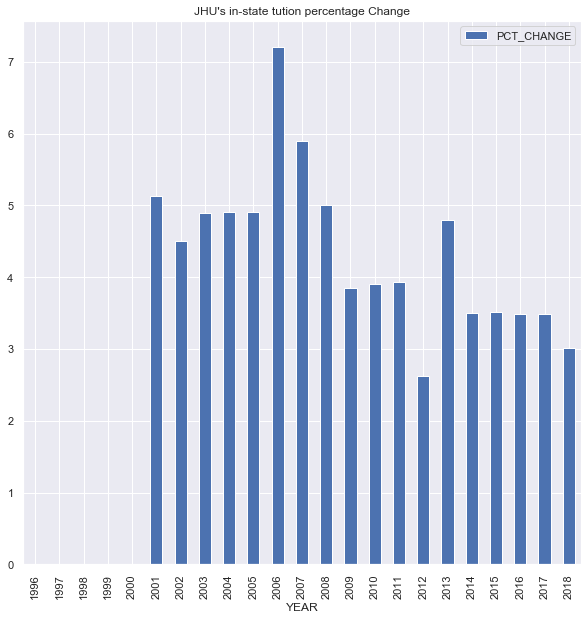

In [61]:
df_jhu.plot.bar(x = "YEAR", y = "PCT_CHANGE", figsize= (10,10))
plt.title("JHU's in-state tution percentage Change")

Text(0.5, 1.0, "JHU's in-state tution percentage Change")

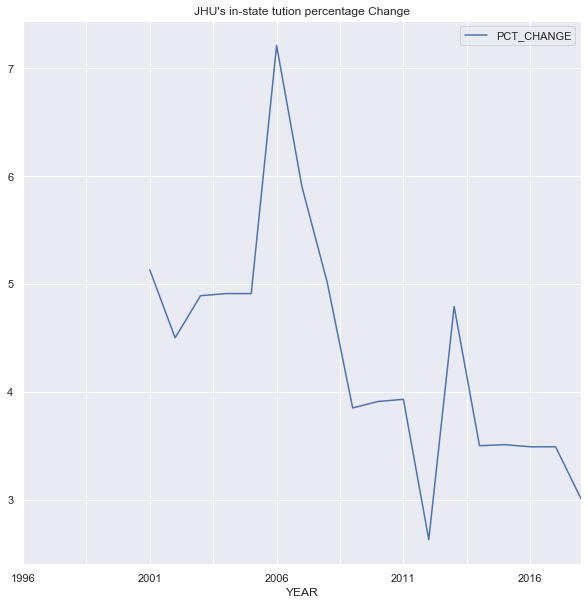

In [62]:
df_jhu.plot.line(x = "YEAR", y = "PCT_CHANGE", figsize= (10,10))
plt.title("JHU's in-state tution percentage Change")

In [63]:
umbc2 = df_umbc[['YEAR']]

In [64]:
# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.

In [65]:
umbc2['UMBC_PCT'] = df_umbc['PCT_CHANGE']

/Users/priyajyesta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
jhu2 = df_jhu[['YEAR']]

In [67]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

In [68]:
jhu2['JHU_PCT'] = df_jhu['PCT_CHANGE']

/Users/priyajyesta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
# Now, merger the two data frames
# and display the new dataframe

In [70]:
merged = pd.merge(umbc2,jhu2)

In [71]:
# Plot UMBC and JHU separately on the same plot 
# However, this does not work since the bars overlap.

In [72]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

Text(0.5, 1.0, "JHU's in-state tution percentage Change")

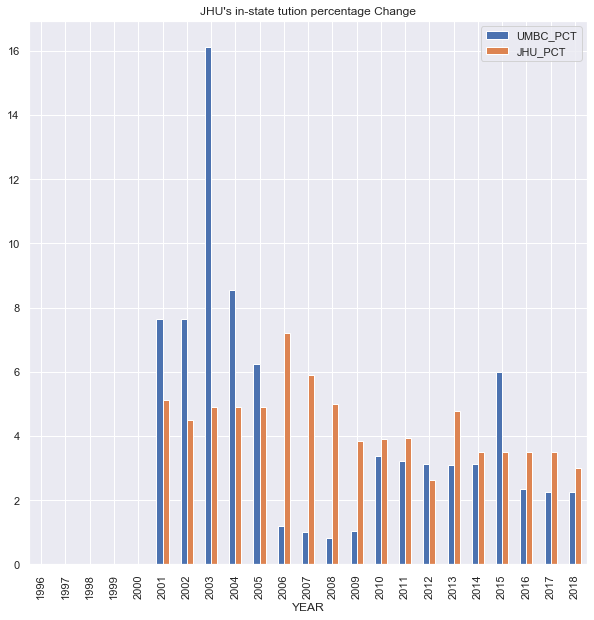

In [73]:
merged.plot.bar(x = "YEAR", y=["UMBC_PCT","JHU_PCT"], figsize= (10,10))
plt.title("JHU's in-state tution percentage Change")

In [74]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

Text(0.5, 1.0, "JHU's in-state tution percentage Change")

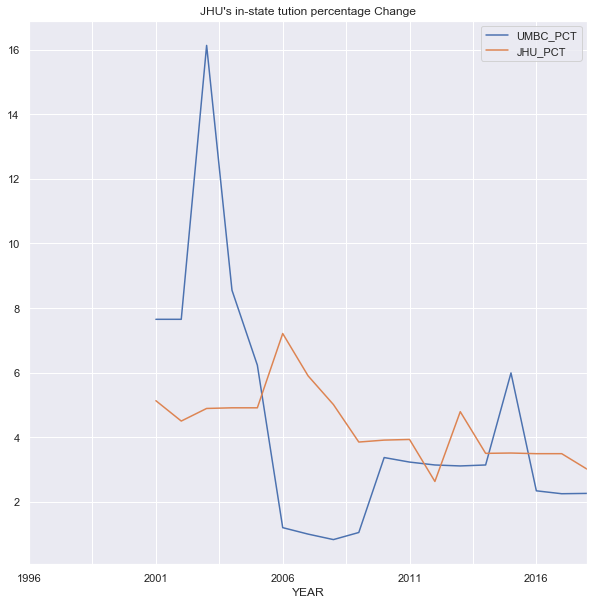

In [75]:
merged.plot.line(x = "YEAR", y=["UMBC_PCT","JHU_PCT"], figsize= (10,10))
plt.title("JHU's in-state tution percentage Change")

In [76]:
# <19> 
# document your observation/conclusion of the comparison plots (bar/line)
# use the following Markdown cell

### There was a peak increase and decrease in UMBC's in-state tution overtime from 1996 to 2019 percent change, where as in JHU there was no much difference in the percentage change in their in-state tution overtime from 1996 to 2019.